
<a id='ifp'></a>
<a href="#"><img src="/_static/img/jupyter-notebook-download-blue.svg" id="notebook_download_badge"></a>

<script>
var path = window.location.pathname;
var pageName = path.split("/").pop().split(".")[0];
var downloadLink = ["/", "_downloads/ipynb/py/", pageName, ".ipynb"].join("");
document.getElementById('notebook_download_badge').parentElement.setAttribute('href', downloadLink);
</script>

<a href="/status.html"><img src="https://img.shields.io/badge/Execution%20test-not%20available-lightgrey.svg" id="executability_status_badge"></a>

<div class="how-to">
        <a href="#" class="toggle"><span class="icon icon-angle-double-down"></span>How to read this lecture...</a>
        <div class="how-to-content">
                <p>Code should execute sequentially if run in a Jupyter notebook</p>
                <ul>
                        <li>See the <a href="/py/getting_started.html">set up page</a> to install Jupyter, Python and all necessary libraries</li>
                        <li>Please direct feedback to <a href="mailto:contact@quantecon.org">contact@quantecon.org</a> or the <a href="http://discourse.quantecon.org/">discourse forum</a></li>
                </ul>
        </div>
</div>

# Optimal Savings III: Occasionally Binding Constraints

## Contents

- [Optimal Savings III: Occasionally Binding Constraints](#Optimal-Savings-III:-Occasionally-Binding-Constraints)  
  - [Overview](#Overview)  
  - [The Optimal Savings Problem](#The-Optimal-Savings-Problem)  
  - [Computation](#Computation)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

## Overview

Next we study an optimal savings problem for an infinitely lived consumer—the “common ancestor” described in [[LS18]](zreferences.ipynb#ljungqvist2012), section 1.3

This is an essential sub-problem for many representative macroeconomic models

- [[Aiy94]](zreferences.ipynb#aiyagari1994)  
- [[Hug93]](zreferences.ipynb#huggett1993)  
- etc.  


It is related to the decision problem in the [stochastic optimal growth
model](optgrowth.ipynb#) and yet differs in important ways

For example, the choice problem for the agent includes an additive income term that leads to an occasionally binding constraint

Our presentation of the model will be relatively brief

To solve the model we will use Euler equation based time iteration, similar to [this lecture](coleman_policy_iter.ipynb#)

This method turns out to be

- Globally convergent under mild assumptions, even when utility is unbounded (both above and below)  
- More efficient numerically than value function iteration  

### References

Other useful references include [[Dea91]](zreferences.ipynb#deaton1991), [[DH10]](zreferences.ipynb#denhaan2010), [[Kuh13]](zreferences.ipynb#kuhn2013), [[Rab02]](zreferences.ipynb#rabault2002),  [[Rei09]](zreferences.ipynb#reiter2009)  and [[SE77]](zreferences.ipynb#schechtmanescudero1977)

## The Optimal Savings Problem


<a id='index-1'></a>
Let’s write down the model and then discuss how to solve it

### Set Up

Consider a household that chooses a state-contingent consumption plan $ \{c_t\}_{t \geq 0} $ to maximize

$$
\mathbb{E} \, \sum_{t=0}^{\infty} \beta^t u(c_t)
$$

subject to


<a id='equation-eqst'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
c_t + a_{t+1} \leq  Ra_t  + z_t,
\qquad c_t \geq 0,
\qquad a_t \geq -b
\qquad t = 0, 1, \ldots
$$
</td><td width=10% style='text-align:center !important;'>
(1)
</td></tr></table>

Here

- $ \beta \in (0,1) $ is the discount factor  
- $ a_t $ is asset holdings at time $ t $, with ad-hoc borrowing constraint $ a_t \geq -b $  
- $ c_t $ is consumption  
- $ z_t $ is non-capital income (wages, unemployment compensation, etc.)  
- $ R := 1 + r $, where $ r > 0 $ is the interest rate on savings  


Non-capital income $ \{z_t\} $ is assumed to be a Markov process taking values in $ Z\subset (0,\infty) $ with stochastic kernel $ \Pi $

This means that $ \Pi(z, B) $ is the probability that $ z_{t+1} \in
B $ given $ z_t = z $

The expectation of $ f(z_{t+1}) $ given $ z_t = z $ is written as

$$
\int f( \acute z) \, \Pi(z, d \acute z)
$$

We further assume that

1. $ r > 0 $ and $ \beta R < 1 $  
1. $ u $ is smooth, strictly increasing and strictly concave with $ \lim_{c \to 0} u'(c) = \infty $ and $ \lim_{c \to \infty} u'(c) = 0 $  


The asset space is $ [-b, \infty) $ and the state is the pair $ (a,z) \in S := [-b,\infty) \times Z $

A *feasible consumption path* from $ (a,z) \in S $ is a consumption
sequence $ \{c_t\} $ such that $ \{c_t\} $ and its induced asset path $ \{a_t\} $ satisfy

1. $ (a_0, z_0) = (a, z) $  
1. the feasibility constraints in [(1)](#equation-eqst), and  
1. measurability of $ c_t $ w.r.t. the filtration generated by $ \{z_1, \ldots, z_t\} $  


The meaning of the third point is just that consumption at time $ t $ can only be
a function of outcomes that have already been observed

### Value Function and Euler Equation

The *value function* $ V \colon S \to \mathbb{R} $ is defined by


<a id='equation-eqvf'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
V(a, z) := \sup \, \mathbb{E}
\left\{
\sum_{t=0}^{\infty} \beta^t u(c_t)
\right\}
$$
</td><td width=10% style='text-align:center !important;'>
(2)
</td></tr></table>

where the supremum is over all feasible consumption paths from $ (a,z) $.

An *optimal consumption path* from $ (a,z) $ is a feasible consumption path from $ (a,z) $ that attains the supremum in [(2)](#equation-eqvf)

To pin down such paths we can use a version of the Euler equation, which in the present setting is


<a id='equation-ee00'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
u' (c_t)
\geq \beta R \,  \mathbb{E}_t [ u'(c_{t+1}) ]
$$
</td><td width=10% style='text-align:center !important;'>
(3)
</td></tr></table>

and


<a id='equation-ee01'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
u' (c_t) = \beta R \,  \mathbb{E}_t [ u'(c_{t+1}) ]
\quad \text{whenever }
c_t < Ra_t + z_t + b
$$
</td><td width=10% style='text-align:center !important;'>
(4)
</td></tr></table>

In essence, this says that the natural “arbitrage” relation $ u' (c_t) = \beta R \,  \mathbb{E}_t [ u'(c_{t+1}) ] $ holds when the choice of current consumption is interior

Interiority means that $ c_t $ is strictly less than its upper bound $ Ra_t + z_t + b $

(The lower boundary case $ c_t = 0 $ never arises at the optimum because
$ u'(0) = \infty $)

When $ c_t $ does hit the upper bound $ Ra_t + z_t + b $, the
strict inequality $ u' (c_t) > \beta R \,  \mathbb{E}_t [ u'(c_{t+1}) ] $
can occur because $ c_t $ cannot increase sufficiently to attain equality

With some thought and effort, one can show that [(3)](#equation-ee00) and [(4)](#equation-ee01) are
equivalent to


<a id='equation-eqeul0'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
u' (c_t)
= \max \left\{
\beta R \,  \mathbb{E}_t [ u'(c_{t+1}) ] \,,\;  u'(Ra_t + z_t + b)
\right\}
$$
</td><td width=10% style='text-align:center !important;'>
(5)
</td></tr></table>

### Optimality Results

1. For each $ (a,z) \in S $, a unique optimal consumption path from $ (a,z) $ exists  
1. This path is the unique feasible path from $ (a,z) $ satisfying the
   Euler equality [(5)](#equation-eqeul0) and the transversality condition  



<a id='equation-eqtv'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
\lim_{t \to \infty} \beta^t \, \mathbb{E} \, [ u'(c_t) a_{t+1} ] = 0.
$$
</td><td width=10% style='text-align:center !important;'>
(6)
</td></tr></table>

Moreover, there exists an *optimal consumption function* $ c^* \colon S \to [0, \infty) $ such that the path from $ (a,z) $ generated by

$$
(a_0, z_0) = (a, z),
\quad
z_{t+1} \sim \Pi(z_t, dy),
\quad
c_t = c^*(a_t, z_t)
\quad \text{and} \quad
a_{t+1} = R a_t + z_t - c_t
$$

satisfies both [(5)](#equation-eqeul0) and [(6)](#equation-eqtv), and hence is the unique optimal
path from $ (a,z) $

In summary, to solve the optimization problem, we need to compute $ c^* $


<a id='ifp-computation'></a>

## Computation


<a id='index-2'></a>
There are two standard ways to solve for $ c^* $

1. Time iteration (TI) using the Euler equality  
1. Value function iteration (VFI)  


Let’s look at these in turn

### Time Iteration

We can rewrite [(5)](#equation-eqeul0) to make it a statement about functions rather than
random variables

In particular, consider the functional equation


<a id='equation-eqeul1'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
u' \circ c \, (a, z)
= \max \left\{
\gamma \int u' \circ c \, \{R a + z - c(a, z), \, \acute z\}
\, \Pi(z,d \acute z)
\, , \;
     u'(Ra + z + b)
     \right\}
$$
</td><td width=10% style='text-align:center !important;'>
(7)
</td></tr></table>

where $ \gamma := \beta R $ and $ u' \circ c(s) := u'(c(s)) $

Equation [(7)](#equation-eqeul1) is a functional equation in $ c $

In order to identify a solution, let $ \mathscr{C} $ be the set of candidate consumption functions $ c \colon S \to \mathbb R $ such that

- each $ c \in \mathscr{C} $ is continuous and (weakly) increasing  
- $ \min Z \leq c(a,z) \leq Ra + z + b $ for all $ (a,z) \in S $  


In addition, let $ K \colon \mathscr{C} \to \mathscr{C} $ be defined as follows:

For given $ c\in \mathscr{C} $, the value $ Kc(a,z) $ is the unique $ t \in J(a,z) $ that solves


<a id='equation-eqsifc'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
u'(t)
= \max \left\{
\gamma \int u' \circ c \, \{R a + z - t, \, \acute z\}
\, \Pi(z,d \acute z)
\, , \;
     u'(Ra + z + b)
     \right\}
$$
</td><td width=10% style='text-align:center !important;'>
(8)
</td></tr></table>

where


<a id='equation-eqbos'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
J(a,z) := \{t \in \mathbb{R} \,:\, \min Z \leq t \leq Ra+ z + b\}
$$
</td><td width=10% style='text-align:center !important;'>
(9)
</td></tr></table>

We refer to $ K $ as Coleman’s policy function operator [[Col90]](zreferences.ipynb#coleman1990)

- $ K $ is a contraction mapping on $ \mathscr{C} $ under the metric  


$$
\rho(c, d) := \| \, u' \circ c - u' \circ d \, \|
    := \sup_{s \in S} | \, u'(c(s))  - u'(d(s)) \, |
 \qquad \quad (c, d \in \mathscr{C})
$$

- The metric $ \rho $ is complete on $ \mathscr{C} $  
- Convergence in $ \rho $ implies uniform convergence on compacts  


In consequence, $ K $ has a unique fixed point $ c^* \in \mathscr{C} $
and $ K^n c \to c^* $ as $ n \to \infty $ for any $ c \in \mathscr{C} $

By the definition of $ K $, the fixed points of $ K $ in $ \mathscr{C} $ coincide with
the solutions to [(7)](#equation-eqeul1) in $ \mathscr{C} $

**TL;DR** The unique optimal policy can be computed by picking any
$ c \in \mathscr{C} $ and iterating with the operator $ K $ defined in [(8)](#equation-eqsifc)

### Value Function Iteration

The Bellman operator for this problem is given by


<a id='equation-eqbop'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
Tv(a, z)
= \max_{0 \leq c \leq Ra + z + b}
\left\{
    u(c) + \beta \int v(Ra + z - c, \acute z) \Pi(z, d \acute z)
\right\}
$$
</td><td width=10% style='text-align:center !important;'>
(10)
</td></tr></table>

We have to be careful with VFI (i.e., iterating with
$ T $) in this setting because $ u $ is not assumed to be bounded

- In fact typically unbounded both above and below — e.g. $ u(c) = \log c $  
- In which case, the standard DP theory does not apply  
- $ T^n v $ is not guaranteed to converge to the value function for arbitrary continous bounded $ v $  


Nonetheless, we can always try the popular strategy “iterate and hope”

We can then check the outcome by comparing with that produced by TI

The latter is known to converge, as described above

### Implementation


<a id='index-3'></a>
Here’s the code for a class called `ConsumerProblem` that stores primitives, as well as

- an initialize, which generates suitable initial conditions for iteration  
- an operator factory which returns
    - a `bellman_operator` function, which implements the Bellman operator $ T $ specified above  
    - a `get_greedy` function, which finds the maximizers of the Bellman operator $ T $
    - a `coleman_operator` function, which implements the Coleman operator $ K $ specified above  

In [32]:
import numpy as np
from quantecon.optimize import brent_max, brentq
from interpolation import interp
from numba import njit, prange
import matplotlib.pyplot as plt
import quantecon as qe

class ConsumerProblem:
    """
    A class that stores primitives for the income fluctuation problem.  The
    income process is assumed to be a finite state Markov chain.

    """

    def __init__(self, 
                 r=0.01,                        # Interest rate
                 β=0.96,                        # Discount rate
                 Π=((0.6, 0.4), 
                    (0.05, 0.95)),              # Markov matrix for z_t
                 z_vals=(0.5, 1.0),             # State space of z_t
                 b=0,                           # Borrowing constraint
                 grid_max=16,
                 grid_size=50,
                 u=np.log,                      # Utility function
                 du=njit(lambda x: 1/x)):       # Derivative of utility

        self.u, self.du = u, du
        self.r, self.R = r, 1 + r
        self.β, self.b = β, b
        self.Π, self.z_vals = np.array(Π), tuple(z_vals)
        self.asset_grid = np.linspace(-b, grid_max, grid_size)
        # Array for value function
        self.v_guess = np.empty((grid_size, len(z_vals)))
        # Array for policy function generated by Bellman operation
        self.σ_guess_bellman = np.empty((grid_size, len(z_vals)))
        # Array for policy function generated by Coleman operation
        self.σ_guess_coleman = np.empty((grid_size, len(z_vals)))
        
        # === Populate V and c === #
        for i_a, a in enumerate(self.asset_grid):
            for i_z, z in enumerate(z_vals):
                c_max = self.R * a + z + b
                self.σ_guess_bellman[i_a, i_z] = c_max
                self.σ_guess_coleman[i_a, i_z] = c_max
                self.v_guess[i_a, i_z] = u(c_max) / (1 - β)
                

def operator_factory(cp, parallel_flag=True):
    """
    A function factory for building the Bellman operator,
    a function that computes greedy policies, as well as
    the Coleman operator.

    Here cp is an instance of ConsumerProblem.
    """
    # === Simplify names, set up arrays === #
    R, Π, β, u, b, du = cp.R, cp.Π, cp.β, cp.u, cp.b, cp.du
    asset_grid, z_vals = cp.asset_grid, cp.z_vals
    γ = R * β

    @njit
    def objective(c, a, z, i_z, v):
        """
        The right hand side of the Bellman equation.
        """
        val = u(c)
        for i in prange(len(z_vals)):
            val += β * interp(asset_grid, v[:, i], R * a + z - c) * Π[i_z, i]
            
        return val

    @njit(parallel=parallel_flag)
    def bellman_operator(v):
        """
        The approximate Bellman operator, which computes and returns the
        updated value function.

        """
        v_new = np.empty(v.shape)

        for i_a in prange(len(asset_grid)):
            a = asset_grid[i_a]
            for i_z in prange(len(z_vals)):
                z = z_vals[i_z]
                σ_star, v_star, _ = brent_max(objective, 1e-8, R * a + z + b, args=(a, z, i_z, v))
                v_new[i_a, i_z] = v_star
                
        return v_new
    
    @njit(parallel=parallel_flag)
    def get_greedy(v):
        """
        Computes the v-greedy policy of a given function v.
        """
        σ = np.empty_like(v)

        for i_a in prange(len(asset_grid)):
            a = asset_grid[i_a]
            for i_z in prange(len(z_vals)):
                z = z_vals[i_z]
                σ_star, v_star, _ = brent_max(objective, 1e-8, R * a + z + b, args=(a, z, i_z, v))
                σ[i_a, i_z] = σ_star

        return σ
    
    @njit
    def euler_diff(c, a, z, i_z, σ):
        """
        The difference of the left hand side and the right hand side
        of the Euler Equation.
        """
        lhs = du(c)
        expectation = 0
        for i in prange(len(z_vals)):
            expectation += du(interp(asset_grid, σ[:, i], R * a + z - c)) * Π[i_z, i]
        rhs = max(γ * expectation, du(R * a + z + b))

        return lhs - rhs

    @njit(parallel=parallel_flag)
    def coleman_operator(σ):
        """
        The approximate Coleman operator.

        Iteration with this operator corresponds to time iteration on the Euler
        equation.  Computes and returns the updated consumption policy
        σ.  The array σ is replaced with a function cf that implements
        univariate linear interpolation over the asset grid for each
        possible value of z.

        """
        σ_new = np.empty_like(σ)
        for i_a in prange(len(asset_grid)):
            a = asset_grid[i_a]
            for i_z in prange(len(z_vals)):
                z = z_vals[i_z]
                σ_star = brentq(euler_diff, 1e-8, R * a + z + b, args=(a, z, i_z, σ)).root
                σ_new[i_a, i_z] = σ_star
                                
        return σ_new

    return bellman_operator, coleman_operator, get_greedy

Both bellman_operator and coleman_operator use linear interpolation along the asset grid to approximate the value and consumption functions

The following exercises walk you through several applications where policy functions are computed

In exercise 1 you will see that while VFI and TI produce similar results, the latter is much faster

Intuition behind this fact was provided in [a previous lecture on time iteration](coleman_policy_iter.ipynb#)

## Exercises


<a id='ifp-ex1'></a>

### Exercise 1

The first exercise is to replicate the following figure, which compares TI and VFI as solution methods

<img src="_static/figures/vfi_vs_pfi.png" style="width:100%;height:100%">

  
The figure shows consumption policies computed by iteration of $ K $ and $ T $ respectively

- In the case of iteration with $ T $, the final value function is used to compute the observed policy  


Consumption is shown as a function of assets with income $ z $ held fixed
at its smallest value

The following details are needed to replicate the figure

- The parameters are the default parameters in the definition of consumerProblem  
- The initial conditions are the default ones from initialize()  
- Both operators are iterated 80 times  


When you run your code you will observe that iteration with $ K $ is
faster than iteration with $ T $

In the IPython shell, a comparison of the operators can be made as follows

In [33]:
cp = ConsumerProblem()
bellman_operator, coleman_operator, get_greedy = operator_factory(cp)

In [34]:
%timeit bellman_operator(cp.v_guess)

135 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%timeit coleman_operator(cp.σ_guess_coleman)

109 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


The output shows that Coleman operator is about 6 times faster

From now on we will only use the Coleman operator


<a id='ifp-ex2'></a>

### Exercise 2

Next let’s consider how the interest rate affects consumption

Reproduce the following figure, which shows (approximately) optimal consumption policies for different interest rates

<img src="_static/figures/ifp_policies.png" style="width:100%;height:100%">

  
- Other than r, all parameters are at their default values  
- r steps through np.linspace(0, 0.04, 4)  
- Consumption is plotted against assets for income shock fixed at the smallest value  


The figure shows that higher interest rates boost savings and hence suppress consumption


<a id='ifp-ex3'></a>

### Exercise 3

Now let’s consider the long run asset levels held by households

We’ll take r = 0.03 and otherwise use default parameters

The following figure is a 45 degree diagram showing the law of motion for assets when consumption is optimal

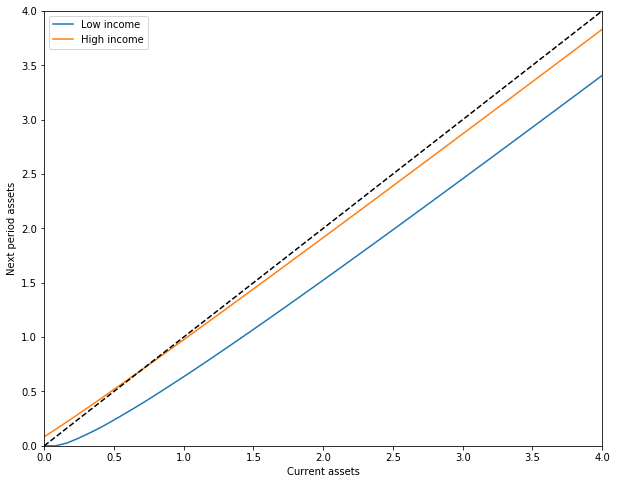

In [36]:
# === solve for optimal consumption === #
m = ConsumerProblem(r=0.03, grid_max=4)
bellman_operator, coleman_operator, get_greedy = operator_factory(m)

K = lambda c: coleman_operator(c)
C = qe.compute_fixed_point(K, m.σ_guess_coleman, verbose=False)
a = m.asset_grid
R, z_vals = m.R, m.z_vals

# === generate savings plot === #
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(a, R * a + z_vals[0] - C[:, 0], label='Low income')
ax.plot(a, R * a + z_vals[1] - C[:, 1], label='High income')
ax.plot(a, a, 'k--')
ax.set(xlabel='Current assets', ylabel='Next period assets',
       xlim=(0, 4), ylim=(0, 4))
ax.legend()
plt.show()

The blue line and orange line represent the function

$$
a' = h(a, z) := R a + z - c^*(a, z)
$$

when income $ z $ takes its high and low values respectively

The dashed line is the 45 degree line

We can see from the figure that the dynamics will be stable — assets do not
diverge

In fact there is a unique stationary distribution of assets that we can calculate by simulation

- Can be proved via theorem 2 of [[HP92]](zreferences.ipynb#hopenhaynprescott1992)  
- Represents the long run dispersion of assets across households when households have idiosyncratic shocks  


Ergodicity is valid here, so stationary probabilities can be calculated by averaging over a single long time series

- Hence to approximate the stationary distribution we can simulate a long time series for assets and histogram, as in the following figure  


<img src="_static/figures/ifp_histogram.png" style="width:100%;height:100%">

  
Your task is to replicate the figure

- Parameters are as discussed above  
- The histogram in the figure used a single time series $ \{a_t\} $ of length 500,000  
- Given the length of this time series, the initial condition $ (a_0, z_0) $ will not matter  
- You might find it helpful to use the MarkovChain class from quantecon  



<a id='ifp-ex4'></a>

### Exercise 4

Following on from exercises 2 and 3, let’s look at how savings and aggregate asset holdings vary with the interest rate

- Note: [[LS18]](zreferences.ipynb#ljungqvist2012) section 18.6 can be consulted for more background on the topic treated in this exercise  


For a given parameterization of the model, the mean of the stationary distribution can be interpreted as aggregate capital in an economy with a unit mass of *ex-ante* identical households facing idiosyncratic shocks

Let’s look at how this measure of aggregate capital varies with the interest
rate and borrowing constraint

The next figure plots aggregate capital against the interest rate for b in (1, 3)

<img src="_static/figures/ifp_agg_savings.png" style="width:100%;height:100%">

  
As is traditional, the price (interest rate) is on the vertical axis

The horizontal axis is aggregate capital computed as the mean of the stationary distribution

Exercise 4 is to replicate the figure, making use of code from previous exercises

Try to explain why the measure of aggregate capital is equal to $ -b $
when $ r=0 $ for both cases shown here

## Solutions

### Exercise 1

Starting value function iteration
Starting policy function iteration


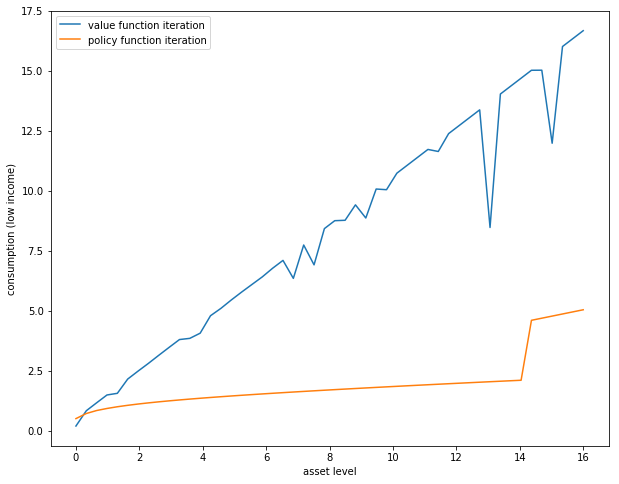

In [38]:
cp = ConsumerProblem()
bellman_operator, coleman_operator, get_greedy = operator_factory(cp)
K = 80

# Bellman iteration
print("Starting value function iteration")
for i in range(K):
    # print f"Current iterate = {i}")
    cp.v_guess = bellman_operator(cp.v_guess)
cp.σ_guess_bellman = get_greedy(cp.v_guess)

# Policy iteration
print("Starting policy function iteration")
for i in range(K):
    # print f"Current iterate = {i}"
    cp.σ_guess_coleman = coleman_operator(cp.σ_guess_coleman)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(cp.asset_grid, cp.σ_guess_bellman[:, 0], label='value function iteration')
ax.plot(cp.asset_grid, cp.σ_guess_coleman[:, 0], label='policy function iteration')
ax.set_xlabel('asset level')
ax.set_ylabel('consumption (low income)')
ax.legend(loc='upper left')
plt.show()

### Exercise 2

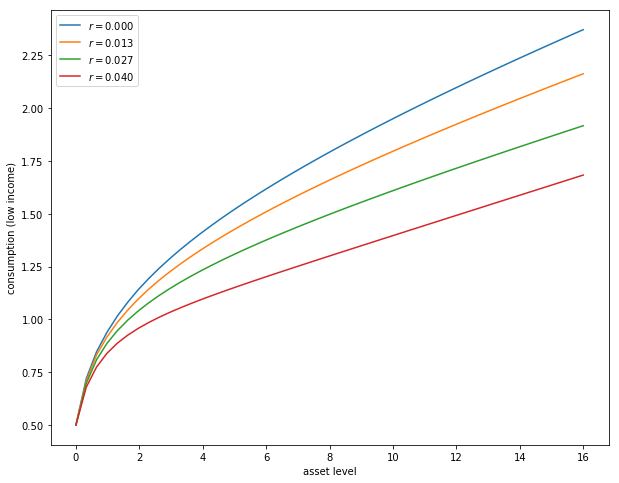

In [39]:
r_vals = np.linspace(0, 0.04, 4)

fig, ax = plt.subplots(figsize=(10, 8))
for r_val in r_vals:
    cp = ConsumerProblem(r=r_val)
    bellman_operator, coleman_operator, get_greedy = operator_factory(cp)
    K = lambda C: coleman_operator(C)
    σ = qe.compute_fixed_point(K, cp.σ_guess_coleman, verbose=False)
    ax.plot(cp.asset_grid, σ[:, 0], label=f'$r = {r_val:.3f}$')

ax.set_xlabel('asset level')
ax.set_ylabel('consumption (low income)')
ax.legend(loc='upper left')
plt.show()

### Exercise 3

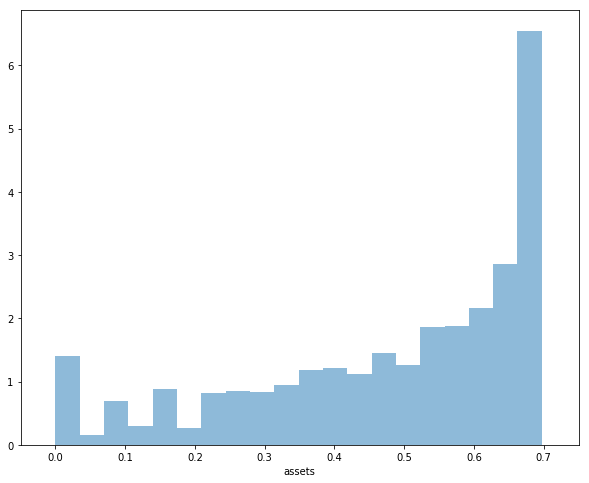

In [40]:
from quantecon import MarkovChain

def compute_asset_series(cp, T=500000, verbose=False):
    """
    Simulates a time series of length T for assets, given optimal savings
    behavior. Parameter cp is an instance of ConsumerProblem
    """

    Π, z_vals, R, σ = cp.Π, cp.z_vals, cp.R, cp.σ_guess_coleman  # Simplify names
    mc = MarkovChain(Π)
    K = lambda C: coleman_operator(C)
    σ = qe.compute_fixed_point(K, σ, verbose=verbose)
    cf = lambda a, i_z: interp(cp.asset_grid, C[:, i_z], a)
    a = np.zeros(T+1)
    z_seq = mc.simulate(T)
    for t in range(T):
        i_z = z_seq[t]
        a[t+1] = R * a[t] + z_vals[i_z] - cf(a[t], i_z)
    return a

cp = ConsumerProblem(r=0.03, grid_max=4)
bellman_operator, coleman_operator, get_greedy = operator_factory(cp)
a = compute_asset_series(cp)

fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(a, bins=20, alpha=0.5, density=True)
ax.set_xlabel('assets')
ax.set_xlim(-0.05, 0.75)
plt.show()

### Exercise 4

The following code takes a little while to run

Finished iteration b=1


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-pack

Finished iteration b=3


/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


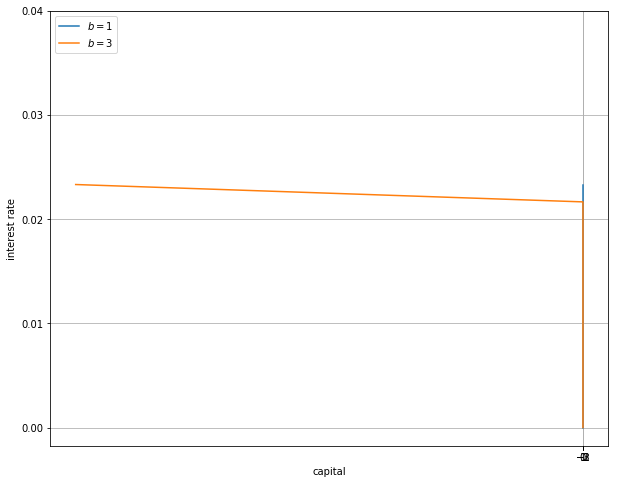

In [24]:
M = 25
r_vals = np.linspace(0, 0.04, M)
fig, ax = plt.subplots(figsize=(10, 8))

for b in (1, 3):
    asset_mean = []
    for r_val in r_vals:
        cp = ConsumerProblem(r=r_val, b=b)
        bellman_operator, coleman_operator, get_greedy = operator_factory(cp)
        mean = np.mean(compute_asset_series(cp, T=250000))
        asset_mean.append(mean)
    ax.plot(asset_mean, r_vals, label=f'$b = {b:d}$')
    print(f"Finished iteration b={b:d}")

ax.set_yticks(np.arange(.0, 0.045, .01))
ax.set_xticks(np.arange(-3, 2, 1))
ax.set_xlabel('capital')
ax.set_ylabel('interest rate')
ax.grid(True)
ax.legend(loc='upper left')
plt.show()